In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
#importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [49]:
#reading csv file
data = pd.read_csv('/content/drive/MyDrive/new_election_dataset (1).csv')
data.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Date
0,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,17,0,34.33,35.95,2187,7,7,0
1,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,1,0,7.47,7.82,476,1,2,0
2,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,2,0,6.14,6.43,391,1,1,0
3,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,11,0,2.39,2.50,152,0,0,0
4,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,10,0,2.04,2.14,130,0,0,0


**Regression Modelling**

In [50]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,GridSearchCV

In [51]:
# Preparing Data set
# dropping Final Mandate variable from X
#assign the value of y for training
x = data.drop(columns=['FinalMandates'])
y = data[["FinalMandates"]]

In [52]:
#Standardizing value of x by using standardscalar to make the data normally distributed
sc = StandardScaler()
a = sc.fit_transform(x)
df_new_x = pd.DataFrame(a,columns=x.columns)
df_new_x.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,Date
0,-1.752045,-1.206238,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,...,-0.133418,-0.900191,-0.845089,1.177919,-0.206043,4.612609,4.603604,-0.190208,4.560088,-0.421705
1,-1.752045,-1.206238,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,...,-0.133418,-0.900191,-0.845089,-1.435236,-0.206043,0.644624,0.642757,-0.282371,0.445033,-0.421705
2,-1.752045,-1.206238,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,...,-0.133418,-0.900191,-0.845089,-1.271914,-0.206043,0.448145,0.447038,-0.286949,0.445033,-0.421705
3,-1.752045,-1.206238,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,...,-0.133418,-0.900191,-0.845089,0.197986,-0.206043,-0.105837,-0.106326,-0.299823,-0.240810,-0.421705
4,-1.752045,-1.206238,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,...,-0.133418,-0.900191,-0.845089,0.034664,-0.206043,-0.157542,-0.157016,-0.301008,-0.240810,-0.421705


In [53]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_new_x,y,test_size=0.20,random_state=45)

**Without Hyper parameter tuning**

In [54]:
#defining a function to find model score,r2 score for the given dataset
models_before_tuning=[LinearRegression(),KNeighborsRegressor(), SVR(kernel='linear'), SVR(kernel='rbf'), RandomForestRegressor()]
mae_before_tuning = []
mse_before_tuning = []
rmse_before_tuning = []
r2score_before_tuning = []

for m in models_before_tuning:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    mae = mean_absolute_error(y_test,predm)
    mse = mean_absolute_error(y_test,predm)
    rmse = np.sqrt(mean_squared_error(y_test,predm))
    r2score = r2_score(y_test,predm)
    mse_before_tuning.append(mse)
    mae_before_tuning.append(mae)
    rmse_before_tuning.append(rmse)
    r2score_before_tuning.append(r2score)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2 score:',r2_score(y_test,predm))
    print('*'*100)
    print('\n')

Score of LinearRegression() is: 0.9860639862141112
MAE: 0.0502111323942291
MSE: 0.03133534918466712
RMSE: 0.17701793464128746
R2 score: 0.9850631623482582
****************************************************************************************************


Score of KNeighborsRegressor() is: 0.9985630991792854
MAE: 0.008344695936733025
MSE: 0.004025088628306517
RMSE: 0.0634435861873091
R2 score: 0.9980813331608155
****************************************************************************************************


Score of SVR(kernel='linear') is: 0.9834247286985575
MAE: 0.06136557150914912
MSE: 0.03656757339504463
RMSE: 0.19122649762792976
R2 score: 0.9825690818410537
****************************************************************************************************


Score of SVR() is: 0.9780573356557837
MAE: 0.06639892738109157
MSE: 0.0518410668474371
RMSE: 0.22768633434494284
R2 score: 0.9752885600658262
****************************************************************************

Ascending order of Mean Squared Error for the 5 regression algorithms:

RandomForest < KNN < Linear < SVM(Linear) < SVM(Non-Linear)

We can conclude that Random Forest performs the best among the five algorithms, with KNN closely trailing behind. The slight difference in performance suggests that both models are competitive, but Random Forest edges out as the top performer in this comparison.

**With Hyper Parameter Tuning**

In [68]:
models_after_tuning = [
    LinearRegression(),
    KNeighborsRegressor(),
    SVR(kernel='linear'),
    SVR(kernel='rbf'),
    RandomForestRegressor()
]

mse_after_tuning= []
mae_after_tuning= []
rmse_after_tuning= []
r2score_after_tuning= []

In [69]:
# Hyperparameter Tuning
param_grid = {
    'LinearRegression': {},  # No hyperparameters to tune for Linear Regression
    'KNeighborsRegressor': {'n_neighbors': [3, 4, 5, 6, 7, 8]},
    'SVR_linear': {'C': [0.1, 1, 10]},
    'SVR_rbf': {'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto', 0.01, 0.1, 1]},
    'RandomForestRegressor': {'n_estimators': [50, 100], 'min_samples_split': [2, 5, 10]}
}

In [73]:
for model_name, model in zip(['LinearRegression', 'KNeighborsRegressor', 'SVR_linear', 'SVR_rbf', 'RandomForestRegressor'], models_after_tuning):
    # Using GridSearchCV for HyperParameter Tuning
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(x_train, y_train)

    # Retreiving the best model with optimal hyperparameters
    best_model = grid_search.best_estimator_

    # Making Predtions with the best model
    predm = best_model.predict(x_test)

    mse = mean_squared_error(y_test, predm)
    mae = mean_absolute_error(y_test, predm)
    rmse = np.sqrt(mean_squared_error(y_test, predm))
    r2score = r2_score(y_test, predm)
    mse_after_tuning.append(mse)
    mae_after_tuning.append(mae)
    rmse_after_tuning.append(rmse)
    r2score_after_tuning.append(r2score)

    # printing Results and Evaluation Metrics
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')
    print('MAE:', mean_absolute_error(y_test, predm))
    print('MSE:', mean_squared_error(y_test, predm))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, predm)))
    print('R2 score:', r2_score(y_test, predm))
    print('*' * 100)
    print('\n')

Best parameters for LinearRegression: {}
MAE: 0.0502111323942291
MSE: 0.03133534918466712
RMSE: 0.17701793464128746
R2 score: 0.9850631623482582
****************************************************************************************************


Best parameters for KNeighborsRegressor: {'n_neighbors': 3}
MAE: 0.0040905372238887365
MSE: 0.0020907190255431327
RMSE: 0.0457243810843092
R2 score: 0.9990034024999719
****************************************************************************************************


Best parameters for SVR_linear: {'C': 1}
MAE: 0.06136557150914912
MSE: 0.03656757339504463
RMSE: 0.19122649762792976
R2 score: 0.9825690818410537
****************************************************************************************************


Best parameters for SVR_rbf: {'C': 10, 'gamma': 0.1}
MAE: 0.05636795423945647
MSE: 0.006982094420646815
RMSE: 0.08355892783327712
R2 score: 0.9966717967552963
*************************************************************************

Ascending order of Mean Squared Error for the 5 regression algorithms:

RandomForest < KNN < SVM(Non-Linear) < Linear < SVM(Linear)

We can conclude that Random Forest performs the best among the five algorithms, with KNN closely trailing behind. The slight difference in performance suggests that both models are competitive, but Random Forest edges out as the top performer in this comparison.

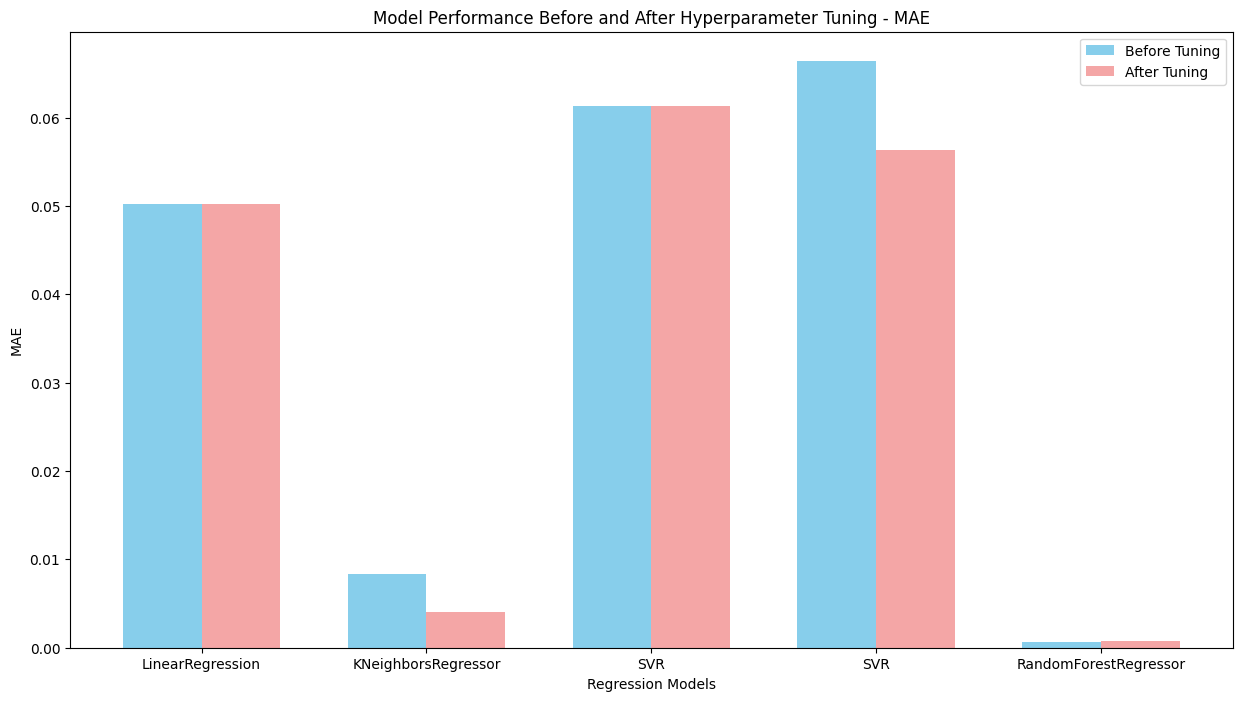

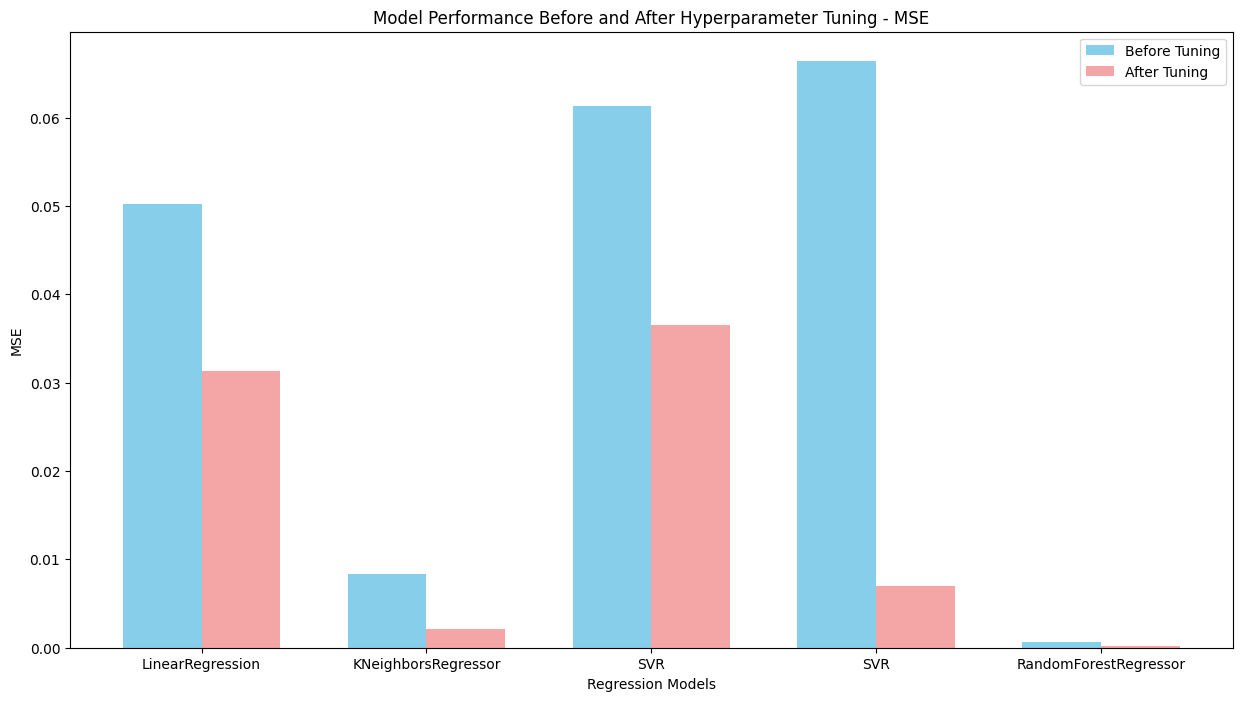

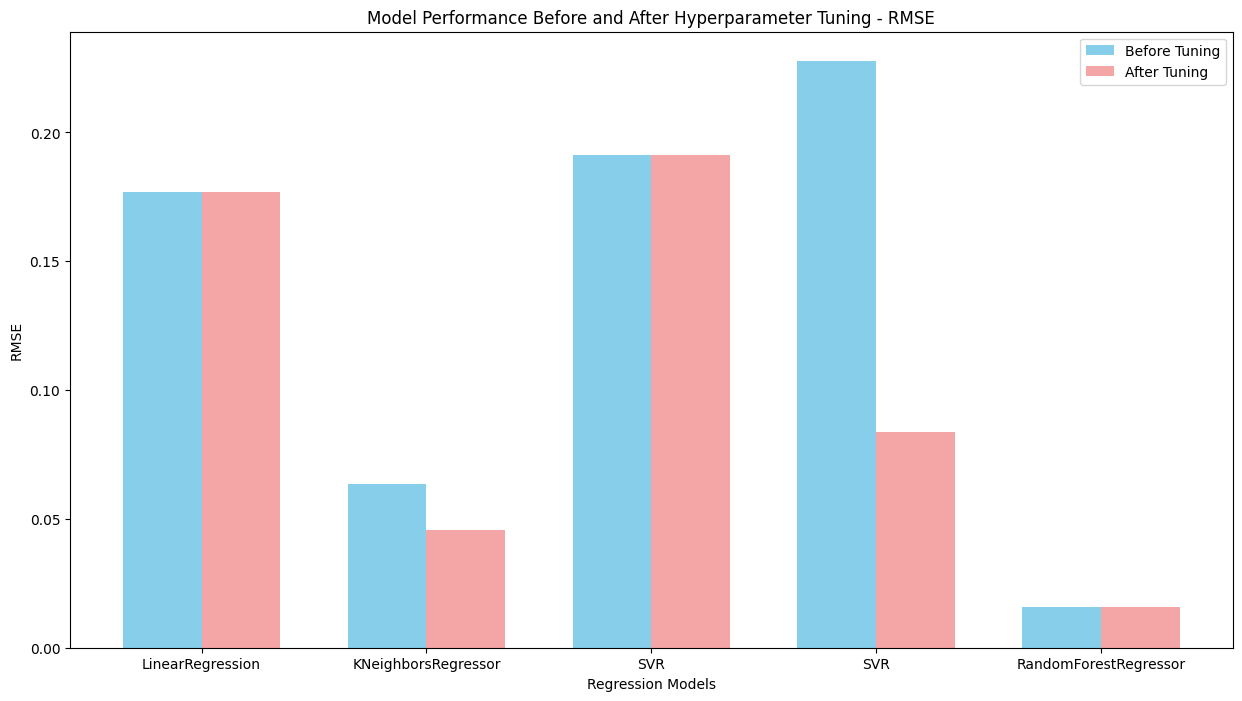

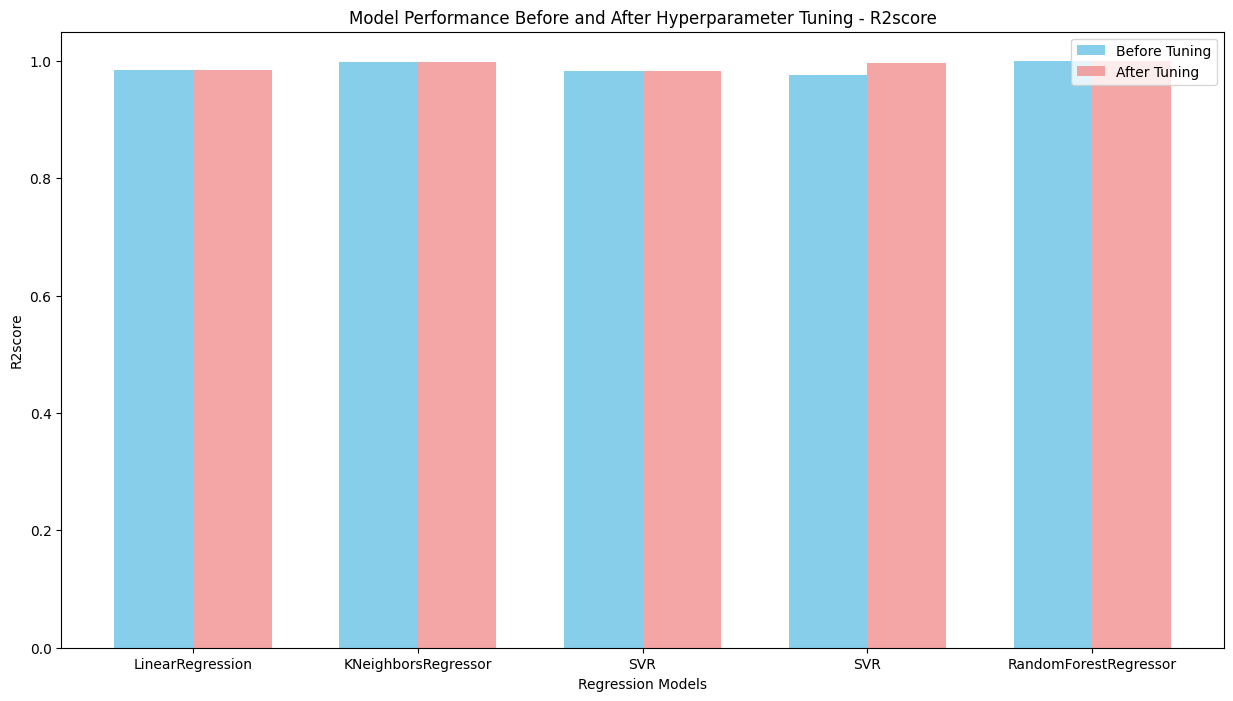

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot error metrics for individual algorithms
def plot_error_metrics(model_labels, metrics_before_tuning, metrics_after_tuning, metric_name):
    plt.figure(figsize=(15, 8))

    # Position for each bar
    x = np.arange(len(model_labels))

    # Bar width
    width = 0.35

    plt.bar(x - width/2, metrics_before_tuning[:len(model_labels)], width, label='Before Tuning', color='skyblue')
    plt.bar(x + width/2, metrics_after_tuning[:len(model_labels)], width, label='After Tuning', color='lightcoral', alpha=0.7)

    plt.xlabel('Regression Models')
    plt.ylabel(metric_name)
    plt.title(f'Model Performance Before and After Hyperparameter Tuning - {metric_name}')
    plt.xticks(x, model_labels)
    plt.legend()

    plt.show()

# Plotting individual error metrics for each algorithm
error_metrics = ['MAE', 'MSE', 'RMSE', 'R2score']

for metric in error_metrics:
    plot_error_metrics(models_labels, globals()[f'{metric.lower()}_before_tuning'], globals()[f'{metric.lower()}_after_tuning'], metric)
